In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
minw=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MinWind\MinWind.csv")

In [3]:
minw

,Year,Month,minws_past,minws_pasttopast,MinWindSpeed
0,2002,1,1.32,1.99,1.82
1,2002,2,1.31,1.39,1.20
2,2002,3,1.61,1.31,1.44
3,2002,4,0.86,2.36,1.33
4,2002,5,3.94,3.04,3.50
...,...,...,...,...,...
211,2019,8,5.15,3.40,3.40
212,2019,9,2.01,1.78,1.78
213,2019,10,1.17,1.43,1.43
214,2019,11,1.56,1.69,1.69


In [4]:
minw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              216 non-null    int64  
 1   Month             216 non-null    int64  
 2   minws_past        216 non-null    float64
 3   minws_pasttopast  216 non-null    float64
 4   MinWindSpeed      216 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [5]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=minw.corr()
corr_matrix

,Year,Month,minws_past,minws_pasttopast,MinWindSpeed
Year,1.000000e+00,4.861859e-15,-0.056457,-0.043386,-0.055971
Month,4.861859e-15,1.000000e+00,0.212949,0.209581,0.205868
minws_past,-5.645672e-02,2.129486e-01,1.000000,0.902736,0.906991
minws_pasttopast,-4.338560e-02,2.095807e-01,0.902736,1.000000,0.908271
MinWindSpeed,-5.597073e-02,2.058675e-01,0.906991,0.908271,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
minw=minw.drop(['Year'],axis=1)

In [10]:
minw.shape

(216, 4)

In [11]:
minw=minw.iloc[:,:].values

In [12]:
minw

array([[ 1.  ,  1.32,  1.99,  1.82],
       [ 2.  ,  1.31,  1.39,  1.2 ],
       [ 3.  ,  1.61,  1.31,  1.44],
       [ 4.  ,  0.86,  2.36,  1.33],
       [ 5.  ,  3.94,  3.04,  3.5 ],
       [ 6.  ,  5.19,  3.7 ,  3.88],
       [ 7.  ,  5.3 ,  5.38,  5.17],
       [ 8.  ,  4.39,  4.33,  4.84],
       [ 9.  ,  1.84,  2.36,  2.72],
       [10.  ,  2.17,  1.  ,  1.7 ],
       [11.  ,  2.2 ,  1.83,  1.86],
       [12.  ,  2.22,  2.2 ,  1.41],
       [ 1.  ,  1.82,  1.32,  1.61],
       [ 2.  ,  1.2 ,  1.31,  1.03],
       [ 3.  ,  1.44,  1.61,  1.18],
       [ 4.  ,  1.33,  0.86,  1.17],
       [ 5.  ,  3.5 ,  3.94,  3.72],
       [ 6.  ,  3.88,  5.19,  4.52],
       [ 7.  ,  5.17,  5.3 ,  4.68],
       [ 8.  ,  4.84,  4.39,  4.  ],
       [ 9.  ,  2.72,  1.84,  2.92],
       [10.  ,  1.7 ,  2.17,  1.61],
       [11.  ,  1.86,  2.2 ,  2.05],
       [12.  ,  1.41,  2.22,  2.02],
       [ 1.  ,  1.61,  1.82,  1.43],
       [ 2.  ,  1.03,  1.2 ,  1.39],
       [ 3.  ,  1.18,  1.44,  1.27],
 

In [13]:
X=minw[:,:-1]
y=minw[:,-1]

In [14]:
X

array([[ 1.  ,  1.32,  1.99],
       [ 2.  ,  1.31,  1.39],
       [ 3.  ,  1.61,  1.31],
       [ 4.  ,  0.86,  2.36],
       [ 5.  ,  3.94,  3.04],
       [ 6.  ,  5.19,  3.7 ],
       [ 7.  ,  5.3 ,  5.38],
       [ 8.  ,  4.39,  4.33],
       [ 9.  ,  1.84,  2.36],
       [10.  ,  2.17,  1.  ],
       [11.  ,  2.2 ,  1.83],
       [12.  ,  2.22,  2.2 ],
       [ 1.  ,  1.82,  1.32],
       [ 2.  ,  1.2 ,  1.31],
       [ 3.  ,  1.44,  1.61],
       [ 4.  ,  1.33,  0.86],
       [ 5.  ,  3.5 ,  3.94],
       [ 6.  ,  3.88,  5.19],
       [ 7.  ,  5.17,  5.3 ],
       [ 8.  ,  4.84,  4.39],
       [ 9.  ,  2.72,  1.84],
       [10.  ,  1.7 ,  2.17],
       [11.  ,  1.86,  2.2 ],
       [12.  ,  1.41,  2.22],
       [ 1.  ,  1.61,  1.82],
       [ 2.  ,  1.03,  1.2 ],
       [ 3.  ,  1.18,  1.44],
       [ 4.  ,  1.17,  1.33],
       [ 5.  ,  3.72,  3.5 ],
       [ 6.  ,  4.52,  3.88],
       [ 7.  ,  4.68,  5.17],
       [ 8.  ,  4.  ,  4.84],
       [ 9.  ,  2.92,  2.72],
       [10

In [15]:
y

array([1.82, 1.2 , 1.44, 1.33, 3.5 , 3.88, 5.17, 4.84, 2.72, 1.7 , 1.86,
       1.41, 1.61, 1.03, 1.18, 1.17, 3.72, 4.52, 4.68, 4.  , 2.92, 1.61,
       2.05, 2.02, 1.43, 1.39, 1.27, 1.86, 3.01, 4.28, 3.82, 5.62, 2.14,
       2.2 , 2.23, 2.17, 1.29, 1.41, 1.54, 1.42, 2.88, 4.12, 4.95, 4.36,
       3.08, 1.8 , 2.16, 1.78, 2.05, 1.63, 1.13, 1.58, 2.81, 3.33, 5.6 ,
       4.96, 1.97, 1.96, 1.83, 1.97, 1.56, 1.39, 1.16, 1.17, 3.11, 3.53,
       4.72, 4.16, 2.78, 1.94, 2.09, 1.72, 1.68, 1.34, 1.03, 1.43, 3.9 ,
       4.34, 4.63, 3.88, 2.55, 1.85, 2.12, 1.87, 1.9 , 1.  , 0.88, 1.36,
       2.77, 4.17, 6.49, 3.5 , 2.42, 2.23, 2.09, 1.51, 1.56, 1.19, 1.4 ,
       1.43, 3.12, 3.61, 4.5 , 3.85, 2.5 , 1.91, 1.69, 1.82, 1.66, 1.17,
       1.3 , 1.14, 2.79, 4.82, 4.62, 4.45, 3.09, 1.64, 2.48, 2.03, 1.08,
       1.34, 1.62, 1.15, 3.49, 4.94, 5.03, 4.69, 3.26, 1.81, 1.12, 1.68,
       1.11, 1.39, 1.56, 1.72, 3.54, 4.32, 5.87, 4.09, 2.47, 2.2 , 1.86,
       1.72, 1.43, 1.58, 1.17, 0.92, 1.76, 4.65, 5.

In [16]:
X.shape

(216, 3)

In [17]:
y.shape

(216,)

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [19]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [20]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

# Linear Regressor

In [21]:
li=LinearRegression()

In [22]:
li.fit(X_train,y_train)

LinearRegression()

In [23]:
Lir_ypred= li.predict(X_test)
Lir_ypred

array([1.71093167, 5.1078827 , 2.06126673, 1.80339143, 1.14342357,
       1.89639417, 1.18950369, 4.82761426, 4.59162395, 2.54639766,
       2.0030896 , 4.28898754, 1.63872312, 1.22302279, 4.35750762,
       1.29509685, 1.31062481, 3.43658586, 3.91230402, 3.43072716,
       1.67905507, 3.63110437, 1.8985268 , 1.39374155, 4.27408533,
       1.27497308, 1.43730839, 1.9541166 , 2.59478354, 1.88339095,
       1.66873721, 1.39613067, 5.30362866, 1.25334243, 1.16063049,
       4.43656661, 4.26600744, 1.48962682, 1.59607826, 1.39885146,
       2.00926635, 2.02266168, 1.90221425, 1.54314555])

In [24]:
Linear=pd.DataFrame({'Actual':y_test,'Predicted':Lir_ypred})
Linear

,Actual,Predicted
0,2.08,1.710932
1,4.72,5.107883
2,1.64,2.061267
3,1.56,1.803391
4,1.17,1.143424
5,2.23,1.896394
6,1.03,1.189504
7,4.96,4.827614
8,5.18,4.591624
9,1.78,2.546398


In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 0.24597949735714691
Root Mean Squared Error: 0.4959632016159535
R2_Score: 0.8650273731429892


In [27]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.8650273731429892

# Lasso Regressor

In [28]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [29]:
Lass_ypred= lass.predict(X_test)

In [30]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 0.24598184274832569
Root Mean Squared Error: 0.4959655660913625
R2_Score: 0.8650260861917929


In [31]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.8650260861917929

# Ridge Regressor

In [32]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [33]:
rid_ypred= rid.predict(X_test)

In [34]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 0.24597948329897346
Root Mean Squared Error: 0.495963187443356
R2_Score: 0.8650273808569191


In [35]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.8650273808569191

# Decision Tree Regressor

In [36]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [37]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [38]:
dt_ypred= dt.predict(X_test)

In [39]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 0.562475
Root Mean Squared Error: 0.749983333148144
R2_Score: 0.6913615601825226


In [40]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.6913615601825226

# KNN Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=12)
kn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=12)

In [42]:
kn1_pred=kn.predict(X_test)

In [43]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 0.1884575441919191
Root Mean Squared Error: 0.43411697063339866
R2_Score: 0.8965905286257572


In [44]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.8965905286257572

# SVR Regressor

In [45]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

In [46]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 0.23778319211832855
Root Mean Squared Error: 0.4876301796631629
R2_Score: 0.8695248083377565


In [47]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.8695248083377565

# Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [50]:
rf_pred=rf.predict(X_test)

In [51]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 0.2989656615909093
Root Mean Squared Error: 0.5467775247675323
R2_Score: 0.8359530728433829


In [52]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8359530728433829

# Bayes Regressor

In [53]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)
y_pred=br.predict(X_test)

In [54]:
bay=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
bay

,Actual,Predicted
0,2.08,1.714295
1,4.72,5.100871
2,1.64,2.063081
3,1.56,1.804408
4,1.17,1.146501
5,2.23,1.898779
6,1.03,1.192576
7,4.96,4.820752
8,5.18,4.585289
9,1.78,2.547135


In [55]:
print('Mean squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score:',r2_score(y_test,y_pred))

Mean squared Error: 0.24578137928777985
Root Mean Squared Error: 0.4957634307689302
R2_Score: 0.865136083488923


In [56]:
bayes_r2_score=r2_score(y_test,y_pred)
bayes_r2_score

0.865136083488923

In [57]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

C:\Users\HP\AppData\Local\Temp\ipykernel_27944\2049796945.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


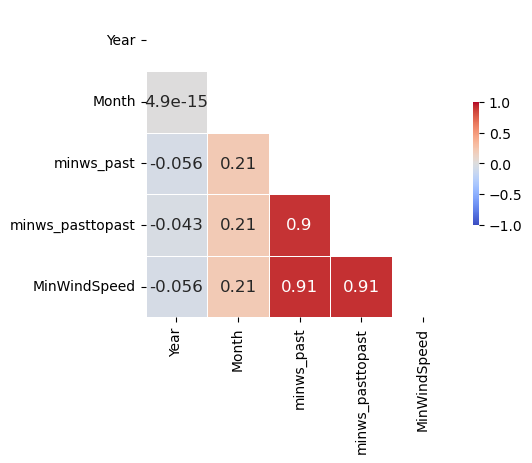

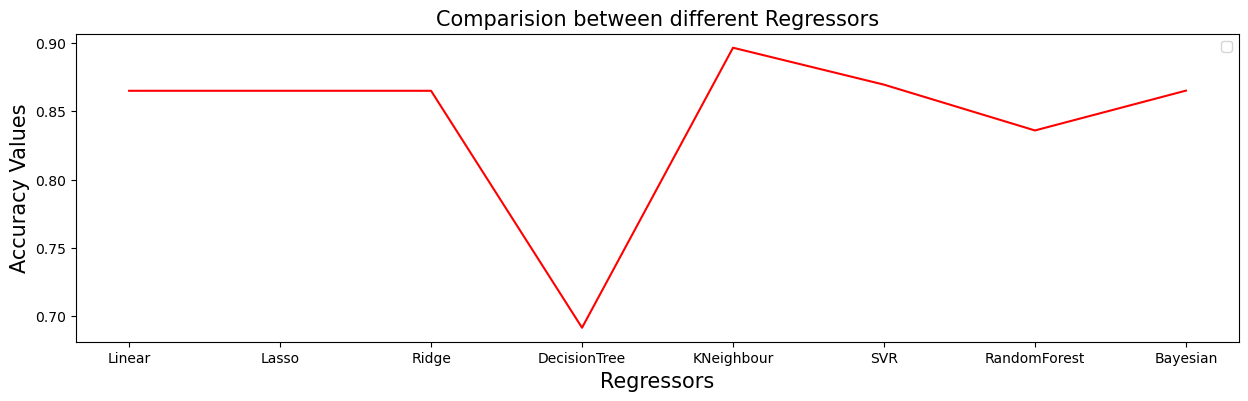

In [58]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


# KNN with neighbour=12 is best for minwind prediction with accuracy of 89.6% followed by Bays with 86.513% 

In [60]:
minw2020=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MinWind\minwind2020pred.csv")

In [61]:
minw2020.drop(['Year'],axis=1,inplace=True)

In [62]:
minw2020=minw2020.iloc[:,:].values

In [63]:
minw2020

array([[ 1.  ,  1.56,  1.3 ],
       [ 2.  ,  1.69,  1.32],
       [ 3.  ,  1.17,  1.15],
       [ 4.  ,  1.84,  1.23],
       [ 5.  ,  2.53,  2.1 ],
       [ 6.  ,  3.86,  3.59],
       [ 7.  ,  5.18,  5.23],
       [ 8.  ,  3.4 ,  5.15],
       [ 9.  ,  1.78,  2.01],
       [10.  ,  1.43,  1.17],
       [11.  ,  1.69,  1.56],
       [12.  ,  1.8 ,  1.58]])

In [64]:
minw2020_pred1=[]

In [65]:
minw2020_pred1=kn.predict(minw2020)

In [66]:
minw2020_pred1

array([1.43416667, 1.325     , 1.29083333, 1.38      , 2.745     ,
       3.96083333, 5.1       , 4.46416667, 2.28666667, 1.735     ,
       1.955     , 1.795     ])

In [67]:
minwind_data=pd.DataFrame(data=minw2020_pred1)
minwind_data

,0
0,1.434167
1,1.325000
2,1.290833
3,1.380000
4,2.745000
5,3.960833
6,5.100000
7,4.464167
8,2.286667
9,1.735000


In [69]:
minwind_data.to_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MinWind\2020minwind.csv")